In [1]:


import os, sys, time, copy, pickle as pkl
import numpy as np
import pandas as pd
import torch

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
output_dir = '/checkpoint/pillutla/pfl/outputs'

# Personalization Output: Stack Overflow

In [35]:
param_list = [
    "finetune", "finetune_inp_layer", "finetune_out_layer",
    "finetune_tr_layer_0", "finetune_tr_layer_1", "finetune_tr_layer_0+1",
    *[f"adapter_{dim}" for dim in [2, 4, 8, 16, 32, 64, 128]]   
]

fn = "so_tiny_try1_{}_{}.csv"

df_tr = []
df_te = []
for param in param_list:
    mode = "train"
    fn1 = fn.format(param, mode)
    df_tr.append(pd.read_csv(os.path.join(output_dir, fn1), index_col=0))
    df_tr[-1].columns.name = fn1
    mode = "test"
    fn1 = fn.format(param, mode)
    df_te.append(pd.read_csv(os.path.join(output_dir, fn1), index_col=0))
    df_te[-1].columns.name = fn1


In [37]:
df_te[0]

so_tiny_try1_finetune_test.csv,loss|mean,loss|std,loss|quantile_0.01,loss|quantile_0.05,loss|quantile_0.1,loss|quantile_0.25,loss|quantile_0.5,loss|quantile_0.75,loss|quantile_0.9,loss|quantile_0.95,...,accuracy_top10|std,accuracy_top10|quantile_0.01,accuracy_top10|quantile_0.05,accuracy_top10|quantile_0.1,accuracy_top10|quantile_0.25,accuracy_top10|quantile_0.5,accuracy_top10|quantile_0.75,accuracy_top10|quantile_0.9,accuracy_top10|quantile_0.95,accuracy_top10|quantile_0.99
pretrained,2.902898,0.525257,1.833483,2.156950,2.260209,2.546490,2.832226,3.282696,3.565653,4.015618,...,0.048819,0.435735,0.435735,0.507533,0.520833,0.559232,0.587413,0.608844,0.628297,0.650538
finetuned,2.778564,0.440846,1.797904,2.087632,2.206541,2.475826,2.737389,3.166198,3.383467,3.463063,...,0.040378,0.490347,0.519254,0.525190,0.550427,0.574940,0.606493,0.635042,0.640449,0.674617


In [40]:
df = pd.DataFrame(index=['pretrained'] + param_list, columns=['accuracy|mean', 'accuracy|quantile_0.5', 'accuracy|std', 'accuracy|quantile_0.1'])
for param, df0 in zip(param_list, df_te):
    for c in df.columns:
        df.at[param, c] = df0.at['finetuned', c]
df0 = df_te[0]
for c in df.columns:
    df.at['pretrained', c] = df0.at['pretrained', c]
df

,accuracy|mean,accuracy|quantile_0.5,accuracy|std,accuracy|quantile_0.1
pretrained,0.236427,0.236794,0.034338,0.200225
finetune,0.25733,0.253895,0.029683,0.228147
finetune_inp_layer,0.238145,0.238371,0.034321,0.2008
finetune_out_layer,0.246057,0.244898,0.033736,0.206774
finetune_tr_layer_0,0.244576,0.244034,0.032602,0.205172
finetune_tr_layer_1,0.25083,0.25,0.032519,0.209997
finetune_tr_layer_0+1,0.252744,0.250808,0.031596,0.215262
adapter_2,0.241227,0.24113,0.034126,0.204545
adapter_4,0.241417,0.240887,0.034063,0.203448
adapter_8,0.241853,0.24113,0.033984,0.204082


In [44]:
rows = ['pretrained', 'finetune', 'finetune_out_layer', 'finetune_tr_layer_1', 'adapter_128']
df2 = df.loc[rows].applymap(lambda x: round(x*100, 2))
df2.columns.name = 'Stack Overflow Results'

df2


Stack Overflow Results,accuracy|mean,accuracy|quantile_0.5,accuracy|std,accuracy|quantile_0.1
pretrained,23.64,23.68,3.43,20.02
finetune,25.73,25.39,2.97,22.81
finetune_out_layer,24.61,24.49,3.37,20.68
finetune_tr_layer_1,25.08,25.00,3.25,21.00
adapter_128,24.50,24.41,3.33,20.67


# Personalization for EMNIST

In [5]:
param_list = [
    "finetune", "finetune_inp_layer", "finetune_out_layer",
    "finetune_res_layer_1+2", "finetune_res_layer_3+4",
    "adapter" 
]

fn = "emnist_{}_{}.csv"

df_tr = []
df_te = []
for param in param_list:
    mode = "train"
    fn1 = fn.format(param, mode)
    df_tr.append(pd.read_csv(os.path.join(output_dir, fn1), index_col=0))
    df_tr[-1].columns.name = fn1
    mode = "test"
    fn1 = fn.format(param, mode)
    df_te.append(pd.read_csv(os.path.join(output_dir, fn1), index_col=0))
    df_te[-1].columns.name = fn1


In [6]:
df = pd.DataFrame(index=['pretrained'] + param_list, columns=['accuracy|mean', 'accuracy|quantile_0.5', 'accuracy|std', 'accuracy|quantile_0.1'])
for param, df0 in zip(param_list, df_te):
    for c in df.columns:
        df.at[param, c] = df0.at['finetuned', c]
df0 = df_te[0]
for c in df.columns:
    df.at['pretrained', c] = df0.at['pretrained', c]
df

,accuracy|mean,accuracy|quantile_0.5,accuracy|std,accuracy|quantile_0.1
pretrained,0.918665,0.925,0.058433,0.848485
finetune,0.930696,0.945946,0.083403,0.863636
finetune_inp_layer,0.928396,0.944444,0.084079,0.857143
finetune_out_layer,0.928766,0.944444,0.084103,0.861111
finetune_res_layer_1+2,0.929268,0.944444,0.083539,0.861111
finetune_res_layer_3+4,0.929929,0.945946,0.083653,0.861111
adapter,0.903567,0.923077,0.099885,0.823529


In [8]:
rows = ['pretrained', 'finetune', 'finetune_out_layer', 'finetune_res_layer_3+4', 'adapter']
df2 = df.loc[rows].applymap(lambda x: round(x*100, 2))
df2.columns.name = 'EMNIST Results'

df2


EMNIST Results,accuracy|mean,accuracy|quantile_0.5,accuracy|std,accuracy|quantile_0.1
pretrained,91.87,92.50,5.84,84.85
finetune,93.07,94.59,8.34,86.36
finetune_out_layer,92.88,94.44,8.41,86.11
finetune_res_layer_3+4,92.99,94.59,8.37,86.11
adapter,90.36,92.31,9.99,82.35


# Centralized training: Stack Overflow

In [3]:
df_lst = []
param_list = ['tiny', 'mini', 'medium', 'base']

fn = 'so_{}_try1_{}.csv'
for p in param_list:
    for t in ['train', 'test']:
        df_lst.append(pd.read_csv(os.path.join(output_dir, fn.format(p, t))))

df_tr = np.asarray(df_lst, dtype=np.object).reshape(-1, 2)[:, 0]
df_te = np.asarray(df_lst, dtype=np.object).reshape(-1, 2)[:, 1]

# df_tr.append(pd.read_csv(os.path.join(output_dir, fn1.format('train'))))
# df_te.append(pd.read_csv(os.path.join(output_dir, fn1.format('test'))))
# df_tr.append(pd.read_csv(os.path.join(output_dir, fn2.format('train'))))
# df_te.append(pd.read_csv(os.path.join(output_dir, fn2.format('test'))))

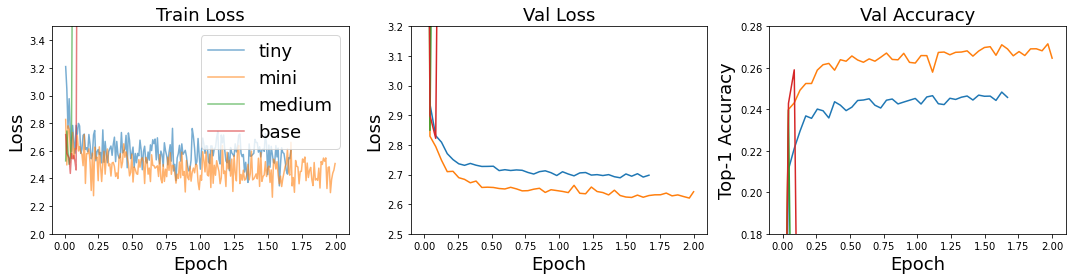

In [4]:
f, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, (do, df) in enumerate(zip(param_list, df_tr)):
    ax[0].plot(df['epoch'], df['avg_loss'], alpha=0.6, color=COLORS[i], label=do)

for param, df in zip(param_list, df_te):
    ax[1].plot(df['epoch'], df['loss|mean'], label=param)
    ax[2].plot(df['epoch'], df['accuracy_top1|mean'], label=param)

ax[0].set_title('Train Loss', fontsize=18)
ax[1].set_title('Val Loss', fontsize=18)
ax[2].set_title("Val Accuracy", fontsize=18)
for a in ax:
    a.set_xlabel('Epoch', fontsize=18)
    a.set_ylabel('Loss', fontsize=18)   
ax[2].set_ylabel("Top-1 Accuracy", fontsize=18)

ax[0].legend(fontsize=18)
ax[0].set_ylim((2, 3.5))
ax[1].set_ylim((2.5, 3.2))
ax[2].set_ylim((0.18, 0.28))

plt.tight_layout()

## EMNIST

In [31]:
df_lst = []

import itertools
# param_list = list(itertools.product(['2e-2', '1e-2', '5e-3', '2.5e-3', '1e-3'], [1114, 2228, 3342, 4456]))
param_list = [('2e-2', 2228), ('1e-2', 3342), ('5e-3', 3342)]
# param_list = list(itertools.product(['5e-3'], [1114, 2228, 3342, 4456]))

fn = 'emnist_resnet_lr{}_lre{}_{}.csv'
for p in param_list:
    for t in ['train', 'test']:
        df_lst.append(pd.read_csv(os.path.join(output_dir, fn.format(p[0], p[1], t))))

df_tr = np.asarray(df_lst, dtype=np.object).reshape(-1, 2)[:, 0]
df_te = np.asarray(df_lst, dtype=np.object).reshape(-1, 2)[:, 1]

# df_tr.append(pd.read_csv(os.path.join(output_dir, fn1.format('train'))))
# df_te.append(pd.read_csv(os.path.join(output_dir, fn1.format('test'))))
# df_tr.append(pd.read_csv(os.path.join(output_dir, fn2.format('train'))))
# df_te.append(pd.read_csv(os.path.join(output_dir, fn2.format('test'))))

In [32]:
for p, df in zip(param_list, df_te):
    print(p, df['accuracy|mean'].to_numpy()[-5:].mean())

('2e-2', 2228) 0.9071895079192999
('1e-2', 3342) 0.9091673497448373
('5e-3', 3342) 0.9100134852851742


('2e-2', 2228) (100, 4)
('1e-2', 3342) (100, 4)
('5e-3', 3342) (100, 4)


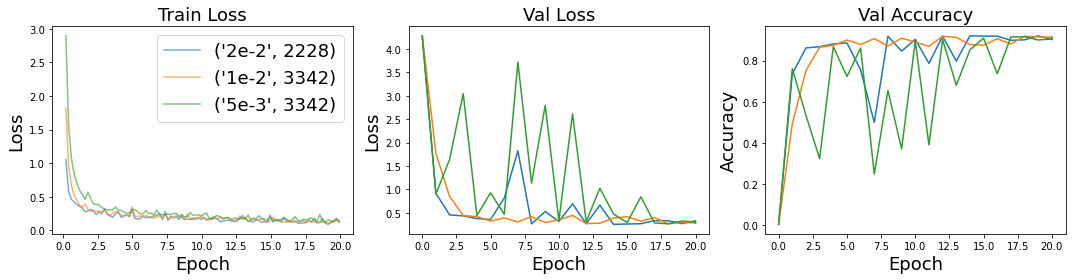

In [33]:
f, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, (p, df) in enumerate(zip(param_list, df_tr)):
    print(p, df.shape)
    ax[0].plot(df['epoch'], df['avg_loss'], alpha=0.6, label=p)

for param, df in zip(param_list, df_te):
    ax[1].plot(df['epoch'], df['loss|mean'], label=param)
    ax[2].plot(df['epoch'], df['accuracy|mean'], label=param)

ax[0].set_title('Train Loss', fontsize=18)
ax[1].set_title('Val Loss', fontsize=18)
ax[2].set_title("Val Accuracy", fontsize=18)
for a in ax:
    a.set_xlabel('Epoch', fontsize=18)
    a.set_ylabel('Loss', fontsize=18)   
ax[2].set_ylabel("Accuracy", fontsize=18)

ax[0].legend(fontsize=18)
# ax[0].set_ylim((2, 3.5))
# ax[1].set_ylim((2.5, 3.2))
# ax[2].set_ylim((0.18, 0.28))

plt.tight_layout()